# Business objective - Review Analysis of Product

### Most of the people are expressing their view by posting it on social platforms about a product. We need to understand the liking or disliking of that product to help the organization to make some decisions about the production and supply of the same in the market. So here consider extracting reviews from ecommerce websites and analyze them to satisfy the objective

## Product used :-IFB 6 Kg 5 Star Fully Automatic Front Loading Washing Machine
<img src="https://m.media-amazon.com/images/I/71JgqNxxuBL._SL1500_.jpg" style="width: 300px;">


In [1]:
# installing the Beautifulsoup library for scraping
# pip install beautifulsoup4

In [2]:
# Installing lxml for parsing
# pip install lxml

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Creating the empty list for storing reviews
review_list=[]

In [8]:
#Defining the function to create soup object
def get_soup(url):
    source= requests.get(url).text
    soup= BeautifulSoup(source, "lxml")
    return soup

In [11]:
#function to extract Review title, rating and review
def get_reviews(soup):
    reviews= soup.find_all("div",{"data-hook":"review"})
    try:
        for item in reviews:
            review = {
            "r_title" : item.find("a", {"data-hook":"review-title"}).text.strip(),
            "r_rating" : item.find("i", {"data-hook" : "review-star-rating"}).text,
            "r_review ": item.find("span", {"data-hook":"review-body"}).text
            }
            review_list.append(review)
    except:
        pass

In [12]:
for i in range (2, 150, 1):
    soup= get_soup("https://www.amazon.in/IFB-Fully-Automatic-Diva-Aqua-SX/product-reviews/B071G3B81W/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i))
    get_reviews(soup)
    print(len(review_list))

10
10
10
20
20
20
20
20
20
20
30
30
30
40
40
40
40
50
50
50
50
50
50
50
60
60
60
60
70
70
70
70
80
90
100
100
100
100
110
110
110
110
120
120
120
130
140
140
140
140
140
150
150
150
150
150
150
150
150
150
150
160
160
160
160
160
170
170
170
170
170
170
170
170
170
170
180
180
180
180
180
180
190
190
200
210
210
210
220
220
230
240
250
250
250
250
250
250
250
250
250
260
260
270
270
270
270
270
270
280
290
290
290
300
300
310
310
320
320
320
320
320
320
320
320
320
320
320
320
330
340
350
350
350
360
370
380
380
380
380
380
380
380
390
390
390
400
400


In [8]:
df= pd.DataFrame(review_list)
df.head()

,r_title,r_rating,r_review
0,Amazon should ban this from selling online as ...,1.0 out of 5 stars,\n\n\n\n\n The media could ...
1,WORST WAsHING MACHINE,1.0 out of 5 stars,\n\n Worst product.. It stopped working after...
2,Value for money,5.0 out of 5 stars,\n\n Good productOnly water tap connecting ad...
3,Relatively lesser warranty but received better...,4.0 out of 5 stars,\n\n Writing this review after 45days of usag...
4,Don't go for it through Amazon,1.0 out of 5 stars,\n\n Amazon doesn't provide the good product....


In [3]:
df.shape

(961, 6)

In [10]:
df["rating"]= df["r_rating"].apply(lambda x : int(x[0]))

In [11]:
df.head()

,r_title,r_rating,r_review,rating
0,Amazon should ban this from selling online as ...,1.0 out of 5 stars,\n\n\n\n\n The media could ...,1
1,WORST WAsHING MACHINE,1.0 out of 5 stars,\n\n Worst product.. It stopped working after...,1
2,Value for money,5.0 out of 5 stars,\n\n Good productOnly water tap connecting ad...,5
3,Relatively lesser warranty but received better...,4.0 out of 5 stars,\n\n Writing this review after 45days of usag...,4
4,Don't go for it through Amazon,1.0 out of 5 stars,\n\n Amazon doesn't provide the good product....,1


In [12]:
df.drop(["r_rating","r_review "], axis=1, inplace=True)
df.head()

,r_title,rating
0,Amazon should ban this from selling online as ...,1
1,WORST WAsHING MACHINE,1
2,Value for money,5
3,Relatively lesser warranty but received better...,4
4,Don't go for it through Amazon,1


In [13]:
df.rating.value_counts().sort_index()

1    241
2     41
3     79
4    207
5    472
Name: rating, dtype: int64

<AxesSubplot:ylabel='rating'>

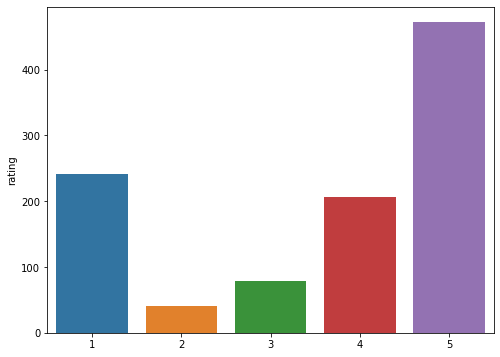

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x=df.rating.value_counts().index, y=df.rating.value_counts())

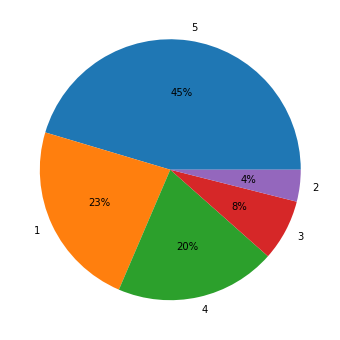

In [15]:
plt.figure(figsize=(8,6))
plt.pie(df.rating.value_counts(), labels=df.rating.value_counts().index,autopct='%.0f%%')
plt.show()

In [16]:
df1 = df[df["rating"]!=3]

In [17]:
df1.head()

,r_title,rating
0,Amazon should ban this from selling online as ...,1
1,WORST WAsHING MACHINE,1
2,Value for money,5
3,Relatively lesser warranty but received better...,4
4,Don't go for it through Amazon,1


In [18]:
df1.shape

(961, 2)

In [21]:
import warnings
warnings.filterwarnings(action="ignore")

In [22]:
# Lets Consider rating of 1 and 2 as Negative review , and considering Negative review as 0
# Lets Consider rating of 4, 5 as Positive Review , and conidering Positive review as 1

df1["sentiment"]= df1["rating"].map({1: 0, 2:0, 4: 1, 5:1})

In [23]:
df1.head()

,r_title,rating,sentiment
0,Amazon should ban this from selling online as ...,1,0
1,WORST WAsHING MACHINE,1,0
2,Value for money,5,1
3,Relatively lesser warranty but received better...,4,1
4,Don't go for it through Amazon,1,0


In [24]:
df1.sentiment.value_counts()

1    679
0    282
Name: sentiment, dtype: int64

<AxesSubplot:ylabel='sentiment'>

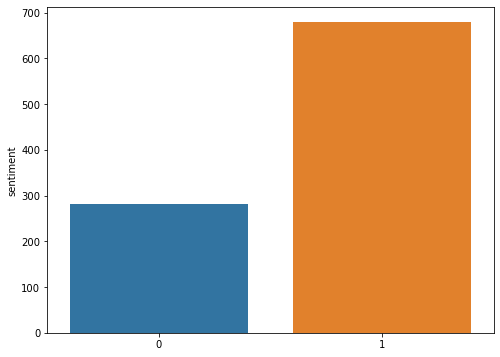

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=df1.sentiment.value_counts().index, y=df1.sentiment.value_counts())

In [26]:
import warnings
warnings.filterwarnings(action="ignore")

In [27]:
df1["title_length"]=df1["r_title"].apply(len)
df1.head()

,r_title,rating,sentiment,title_length
0,Amazon should ban this from selling online as ...,1,0,80
1,WORST WAsHING MACHINE,1,0,21
2,Value for money,5,1,15
3,Relatively lesser warranty but received better...,4,1,55
4,Don't go for it through Amazon,1,0,30


<AxesSubplot:xlabel='title_length', ylabel='Count'>

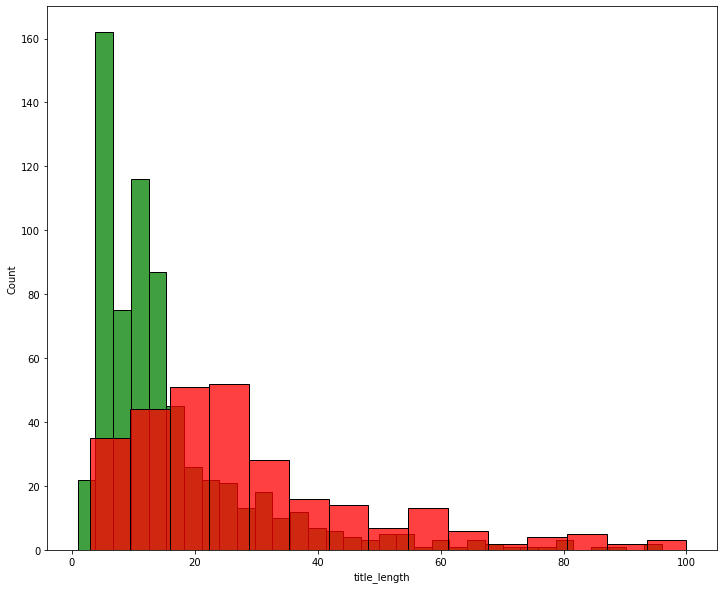

In [28]:
plt.figure(figsize=(12,10))
sns.histplot(df1[df1["sentiment"]==1]['title_length'], color="Green")
sns.histplot(df1[df1["sentiment"]==0]['title_length'], color="red")

In [29]:
df1.corr()

,rating,sentiment,title_length
rating,1.000000,0.966164,-0.334458
sentiment,0.966164,1.000000,-0.331166
title_length,-0.334458,-0.331166,1.000000


In [30]:
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [31]:
#lemmatizer=WordNetLemmatizer()

In [211]:
def text_cleaner (text):
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    #cleaned= [lemmatizer.lemmatize(word) for word in cleaned]
    cleaned= ' '.join(cleaned)
    return cleaned

In [33]:
df1["Cleaned_review"]=df1["r_title"].apply(text_cleaner)
df1.head()

,r_title,rating,sentiment,title_length,Cleaned_review
0,Amazon should ban this from selling online as ...,1,0,80,amazon should ban this from selling online as ...
1,WORST WAsHING MACHINE,1,0,21,worst washing machine
2,Value for money,5,1,15,value for money
3,Relatively lesser warranty but received better...,4,1,55,relatively lesser warranty but received better...
4,Don't go for it through Amazon,1,0,30,don t go for it through amazon


In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

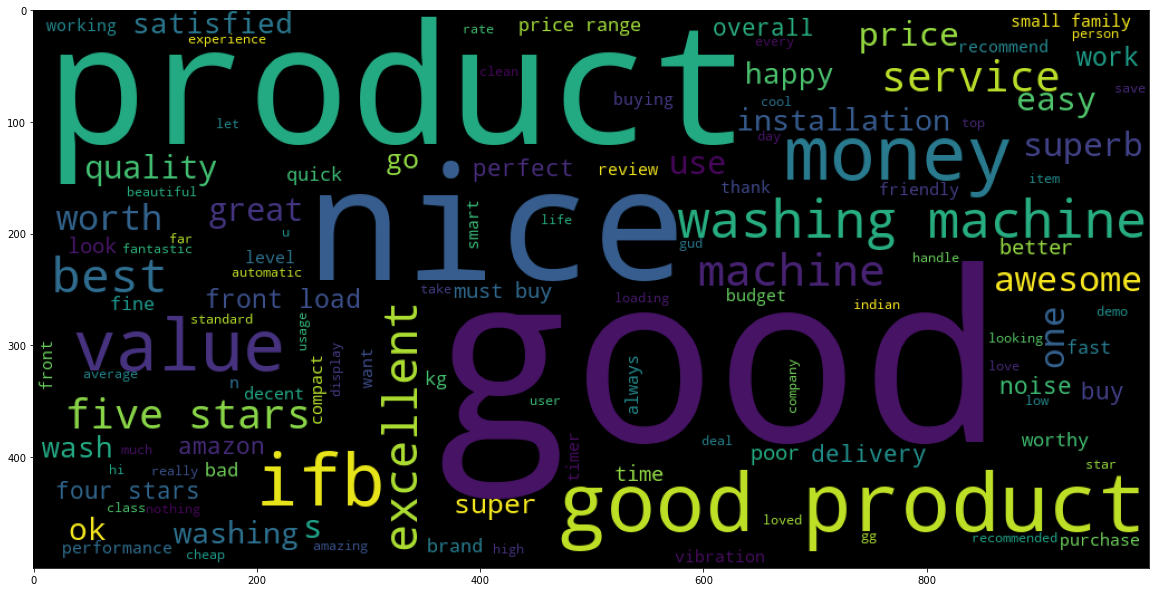

In [35]:
wc = WordCloud(width=1000,height=500, min_font_size=10)
wc_pos=wc.generate(df1[df1["sentiment"]==1]["Cleaned_review"].str.cat(sep=" "))
plt.figure(figsize=(20,20))
plt.imshow(wc_pos)

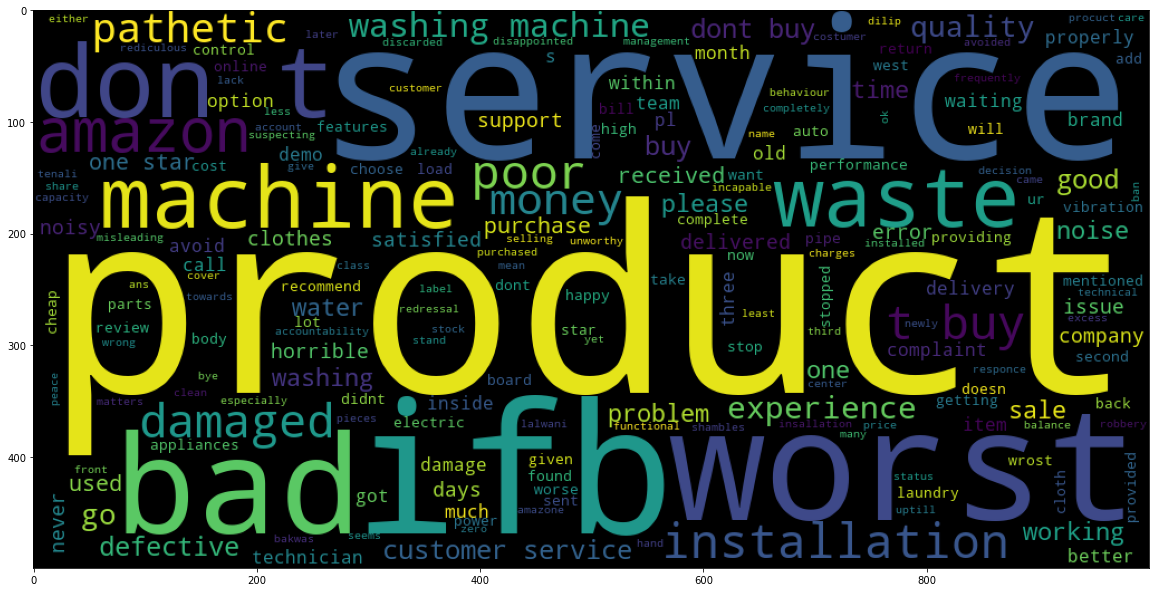

In [36]:
wc = WordCloud(width=1000,height=500, min_font_size=10)
wc_neg = wc.generate(df1[df1["sentiment"]==0]["Cleaned_review"].str.cat(sep=" "))
plt.figure(figsize=(20,20))
plt.imshow(wc_neg)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer(binary=True)
#tfidf= TfidfVectorizer(max_features=1000)

In [38]:
X =cv.fit_transform(df1["Cleaned_review"]).toarray()

In [39]:
X.shape

(961, 700)

In [40]:
y= df1["sentiment"].values
y

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.naive_bayes import BernoulliNB , GaussianNB, MultinomialNB

In [44]:
bnb = BernoulliNB()
gnb= GaussianNB()
mnb= MultinomialNB()

In [45]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 33  25]
 [  5 130]]


0.844559585492228
0.8387096774193549


In [46]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 42  16]
 [  8 127]]


0.8756476683937824
0.8881118881118881


In [47]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 43  15]
 [  6 129]]


0.8911917098445595
0.8958333333333334


In [162]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 42  16]
 [  5 130]]


0.8911917098445595
0.8904109589041096


In [52]:
from sklearn.svm import SVC
svc = SVC(C=10, kernel='rbf')
svc.fit(X_train, y_train)
y_pred =svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 43  15]
 [  9 126]]


0.8756476683937824
0.8936170212765957


In [53]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [54]:
rf= RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 38  20]
 [  5 130]]


0.8704663212435233
0.8666666666666667


In [55]:
ad= AdaBoostClassifier(n_estimators=500 , random_state=42)
ad.fit(X_train, y_train)
y_pred =ad.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 37  21]
 [ 13 122]]


0.8238341968911918
0.8531468531468531


In [56]:
gb = GradientBoostingClassifier(n_estimators=1000, random_state=42,learning_rate=0.01)
gb.fit(X_train, y_train)
y_pred =gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 34  24]
 [  3 132]]


0.8601036269430051
0.8461538461538461


In [57]:
etc= ExtraTreesClassifier(n_estimators=500)
etc.fit(X_train, y_train)
y_pred =etc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 40  18]
 [  8 127]]


0.8652849740932642
0.8758620689655172


In [58]:
etc= ExtraTreesClassifier(n_estimators=500)
etc.fit(X, y)

ExtraTreesClassifier(n_estimators=500)

In [13]:
from sklearn.ensemble import VotingClassifier

In [14]:
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))

estimator.append(('etc', ExtraTreesClassifier(n_estimators=500)))

estimator.append(('rf',RandomForestClassifier(n_estimators=500, random_state=42) ))

estimator.append(('mnb',MultinomialNB() ))

NameError: name 'LogisticRegression' is not defined

In [427]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X, y)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('etc', ExtraTreesClassifier(n_estimators=500)),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42)),
                             ('mnb', MultinomialNB())])

In [428]:
rf.fit(X,y)
lr.fit(X,y)
mnb.fit(X,y)

MultinomialNB()

In [484]:
text="waste"
cleaned= text_cleaner(text)
cleaned
cv1=cv.transform([cleaned])

In [485]:
etc.predict(cv1)

array([0], dtype=int64)

In [486]:
rf.predict(cv1)

array([0], dtype=int64)

In [487]:
lr.predict(cv1)

array([0], dtype=int64)

In [488]:
mnb.predict(cv1)

array([0], dtype=int64)

In [489]:
vot_hard.predict(cv1)

array([0], dtype=int64)

In [11]:
import pickle

In [12]:
file = open("C:\\Users\\STUDENT\\Desktop\\New folder\\Washing machine\\votc.pkl","wb")
pickle.dump(vot_hard , file)

NameError: name 'vot_hard' is not defined

In [457]:
file1 = open("C:\\Users\\STUDENT\\Desktop\\New folder\\Washing machine\\vect.pkl","wb")
pickle.dump(cv , file1)

In [456]:
df1.to_excel("C:\\Users\\STUDENT\\Desktop\\New folder\\Washing machine\\Washinmachine.xlsx")